# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

In [75]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 10.1 MB/s eta 0:00:000:0100:01


                                             |          | [  0%]   00:00 -> (? left)


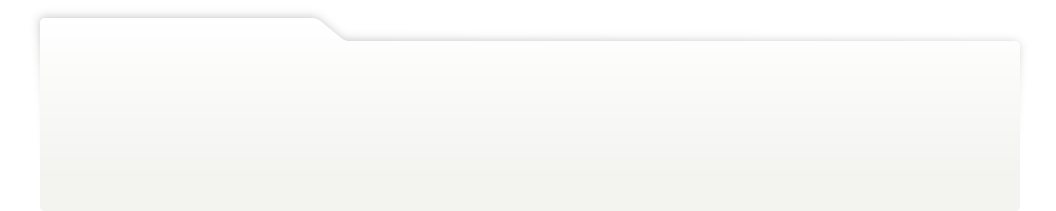
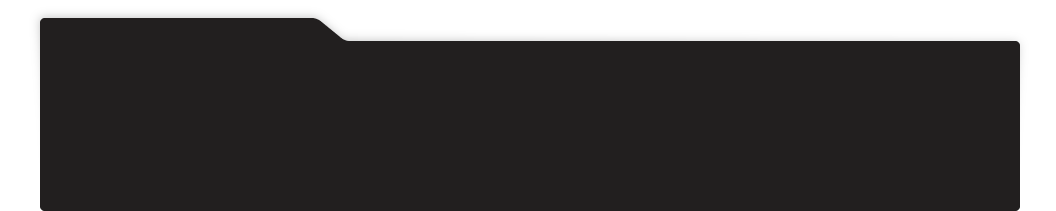
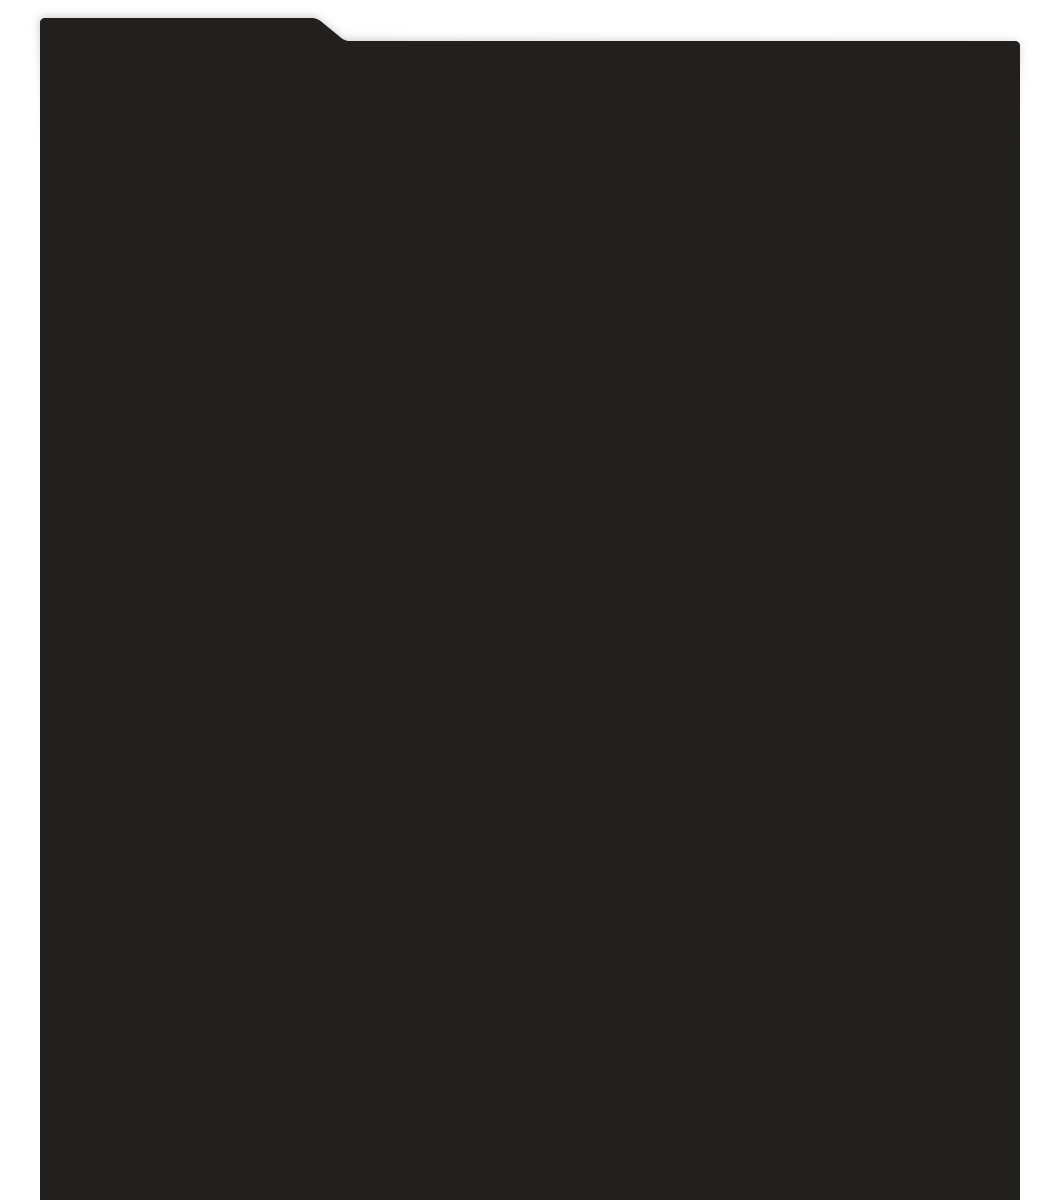
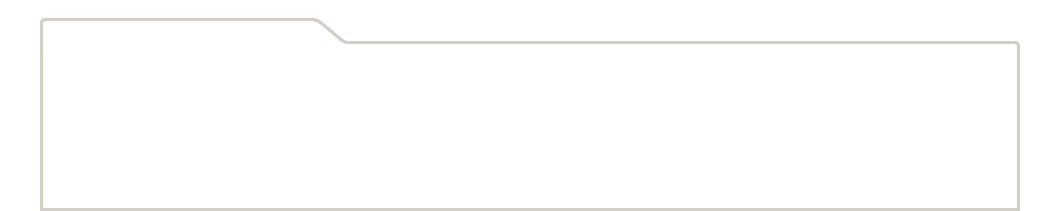
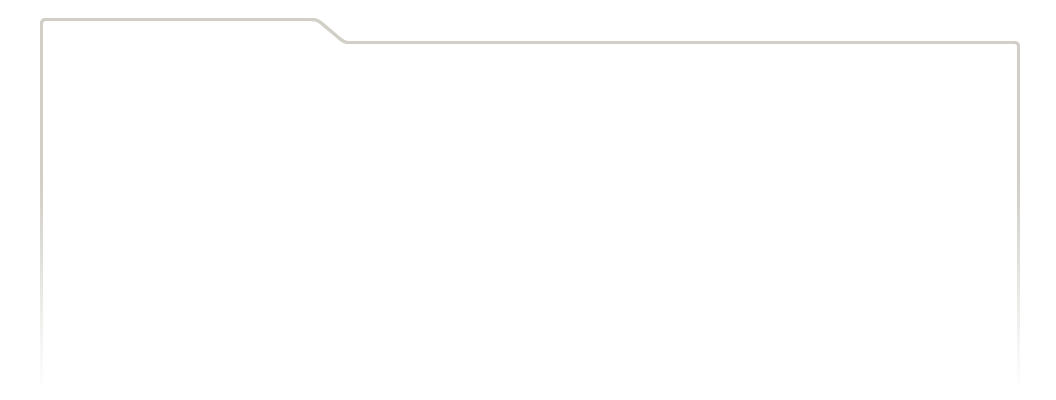
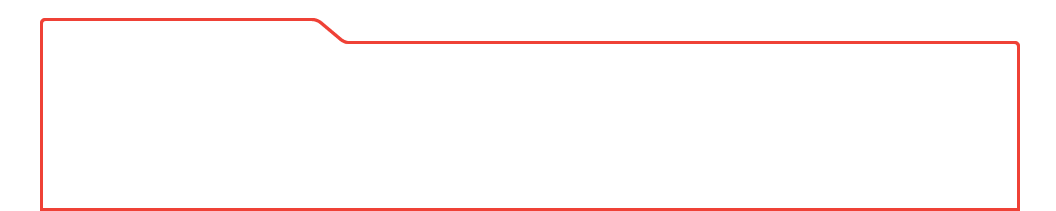
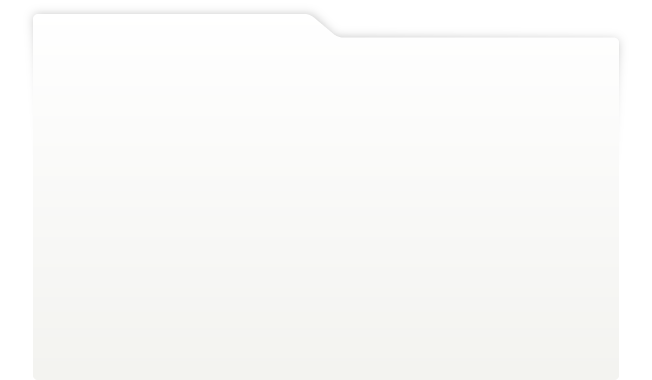
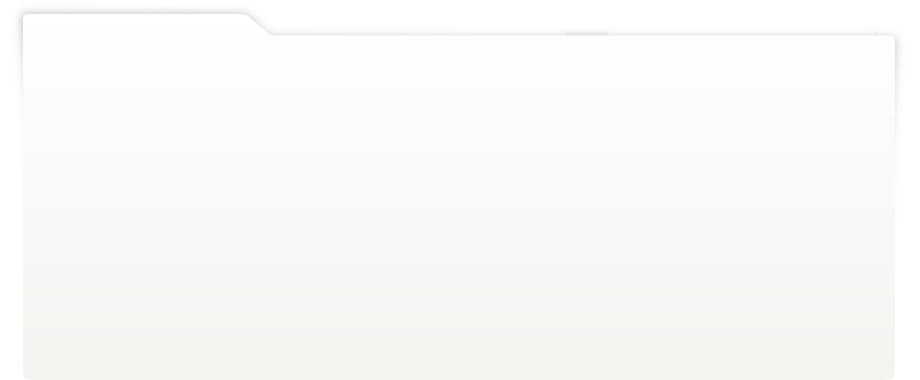
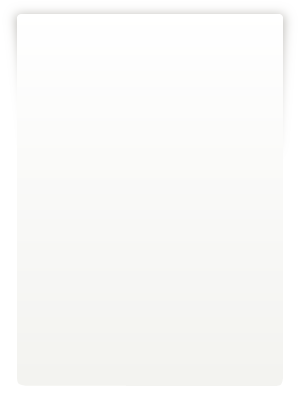
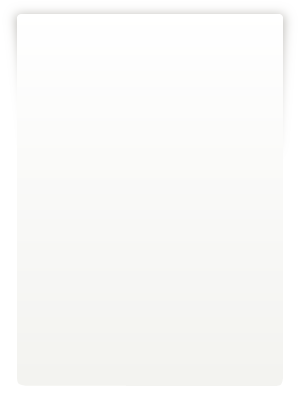
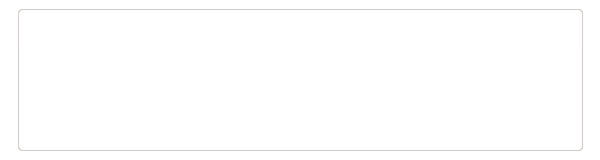
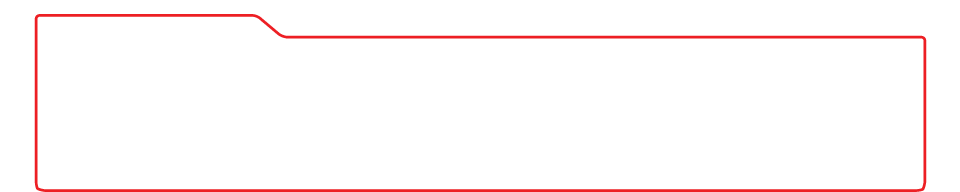
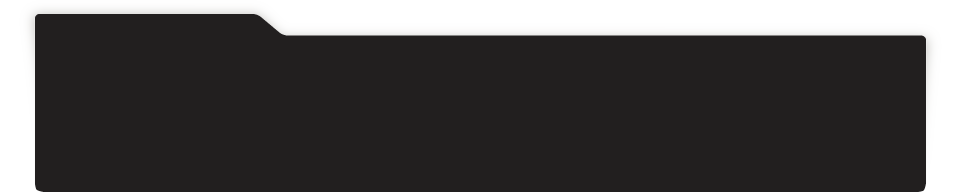
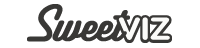
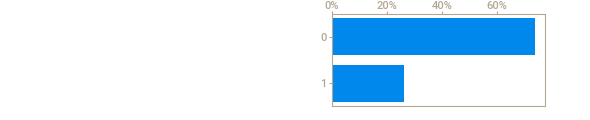
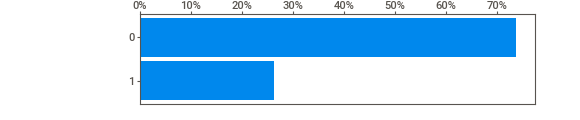
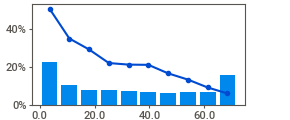
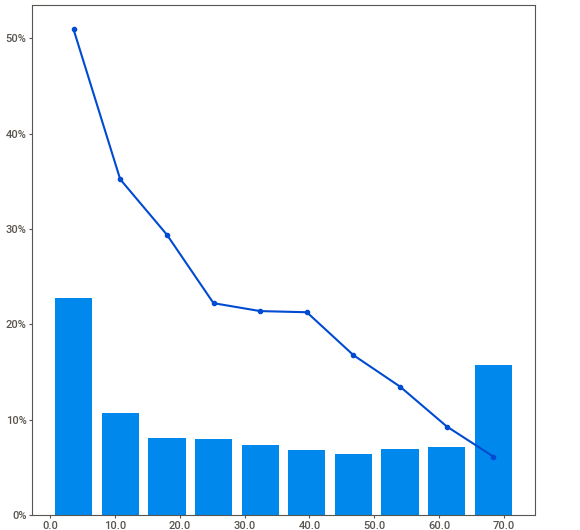
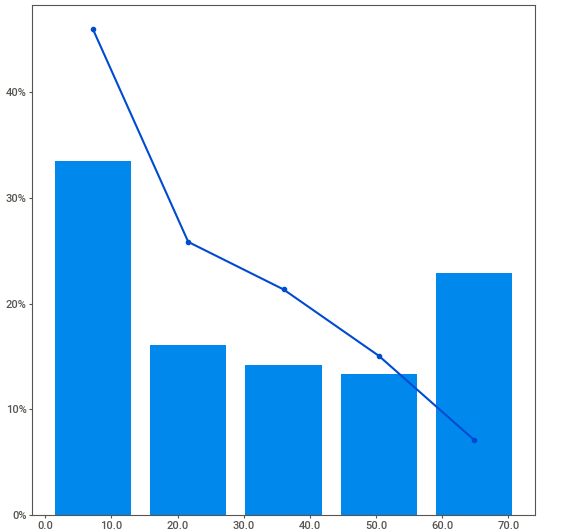
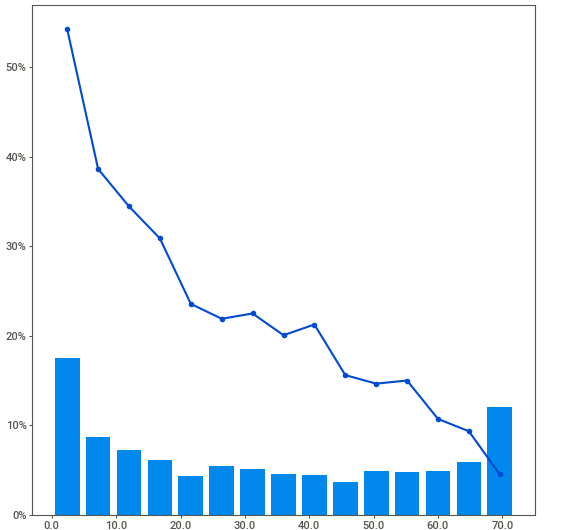
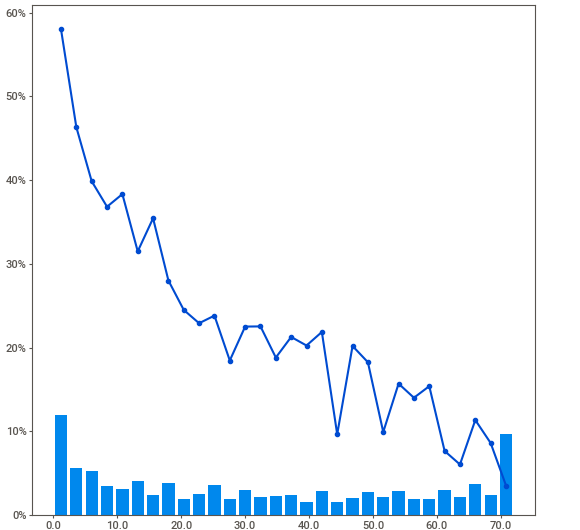
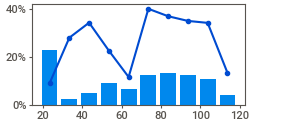
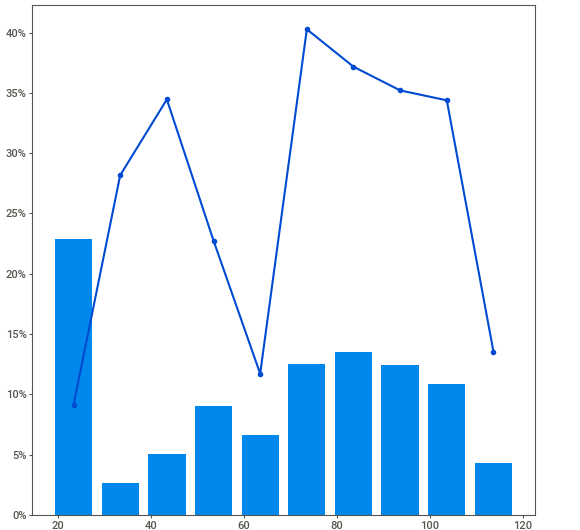
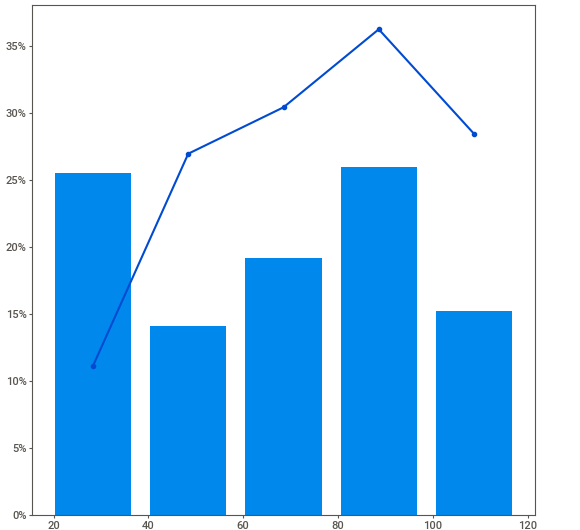
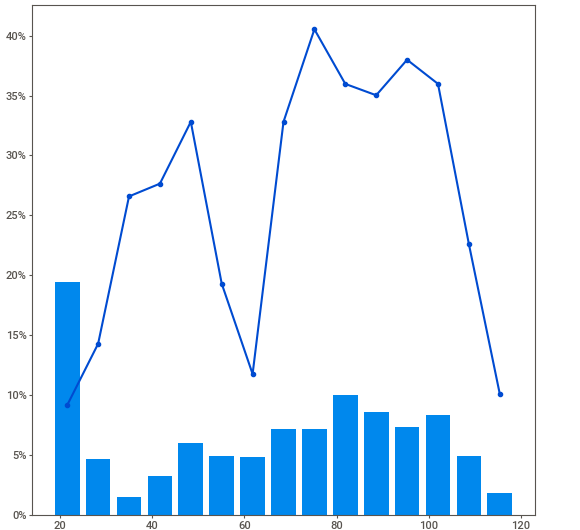
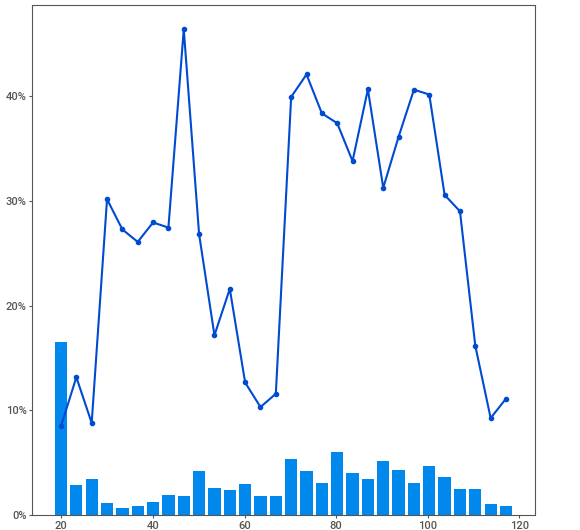
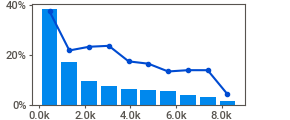
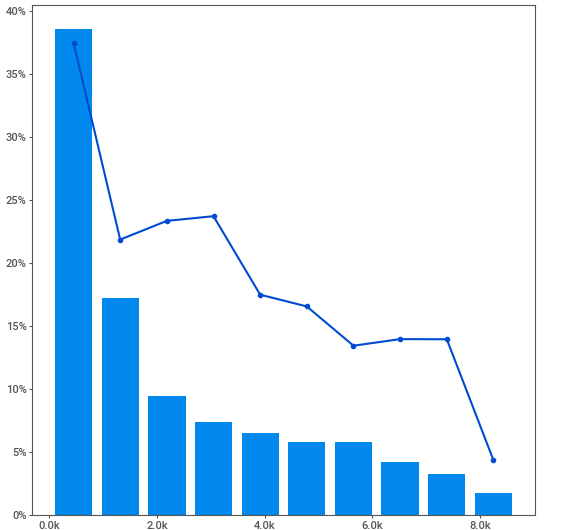
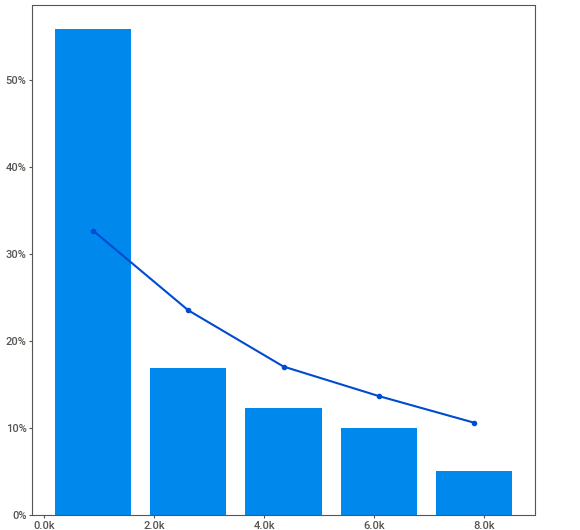
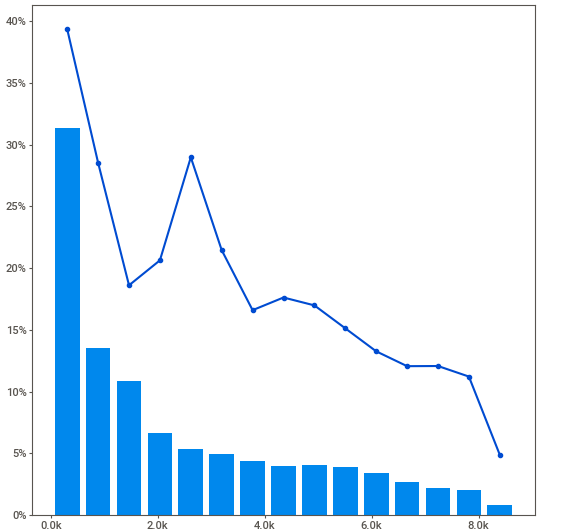
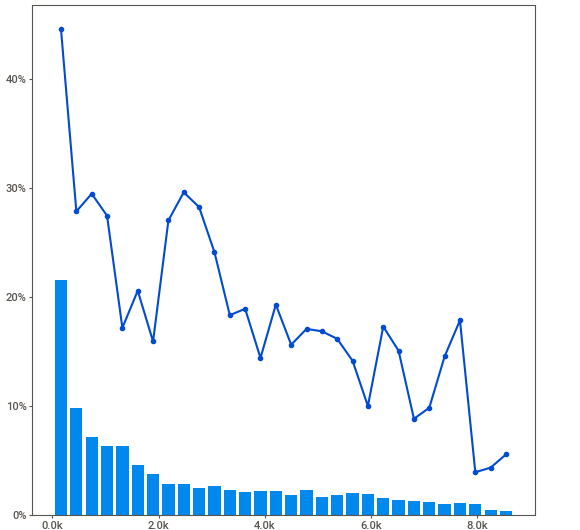
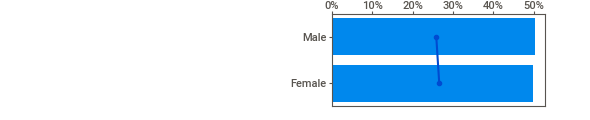
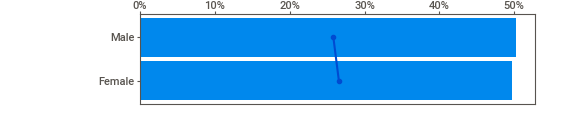
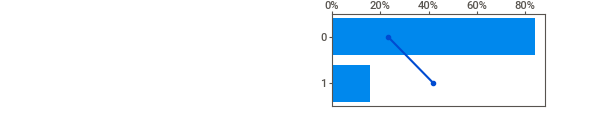
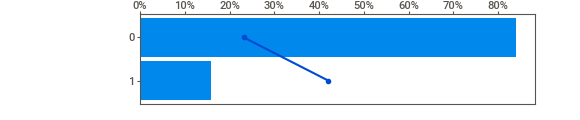
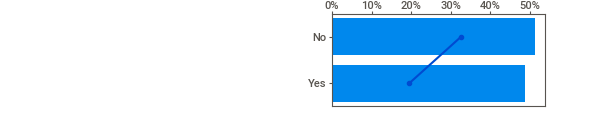
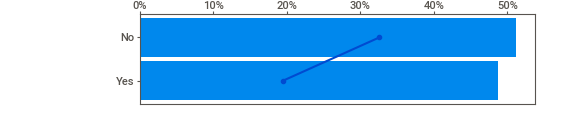
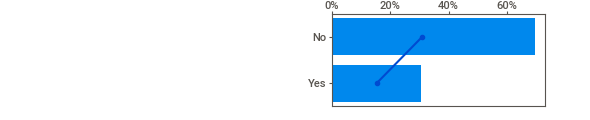
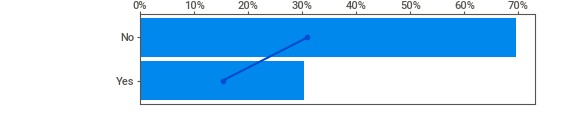
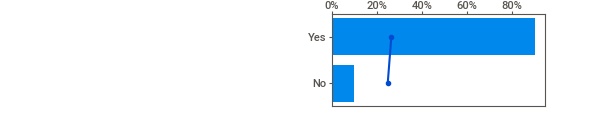
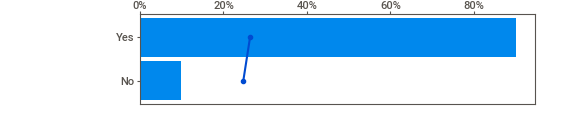
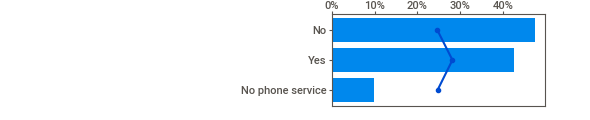
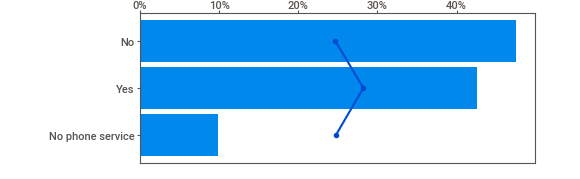
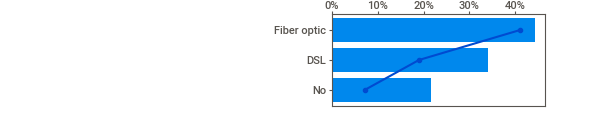
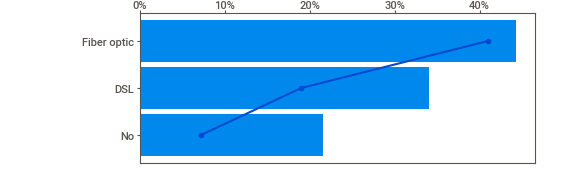
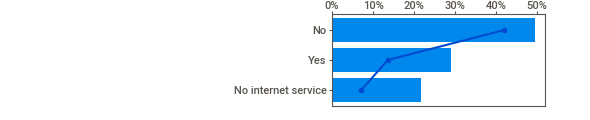
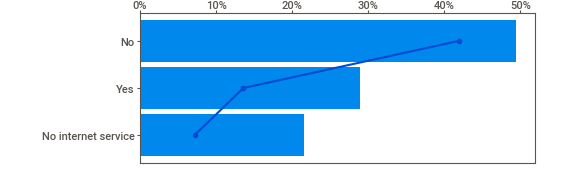
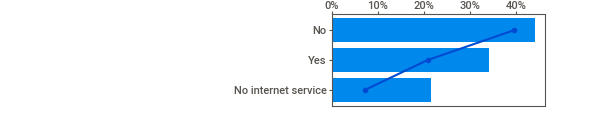
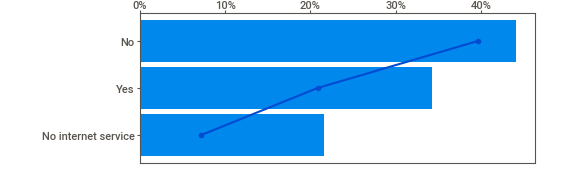
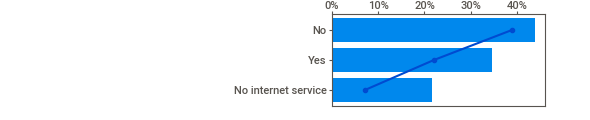
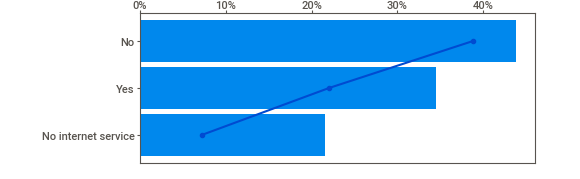
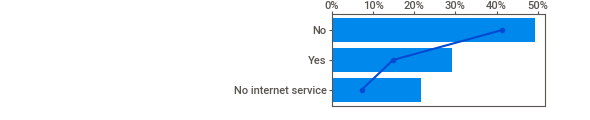
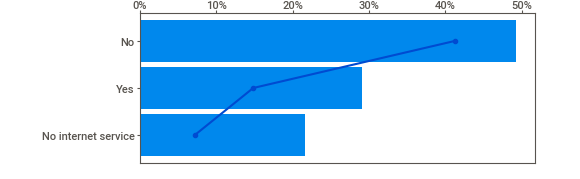
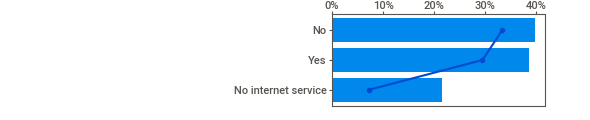
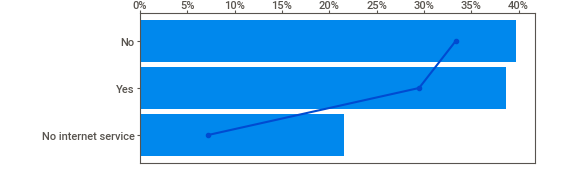
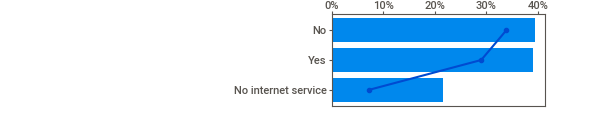
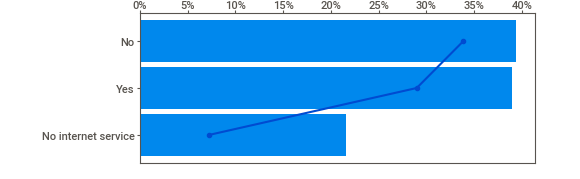
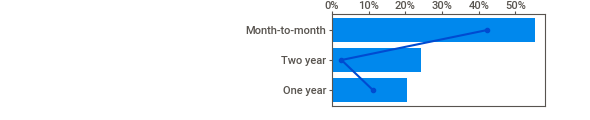
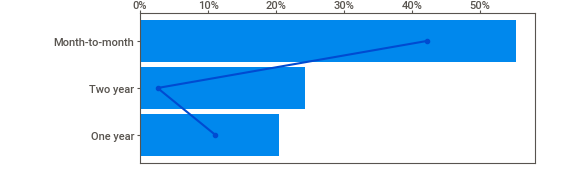
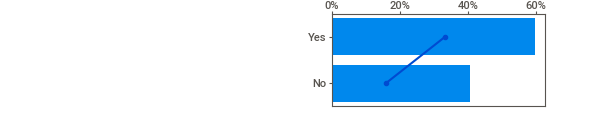
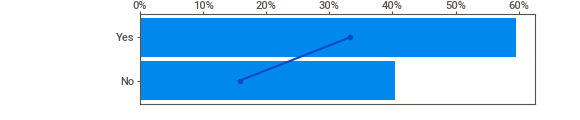
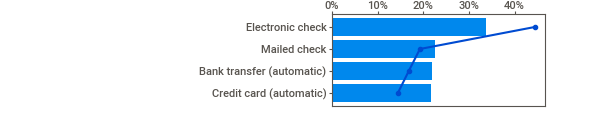
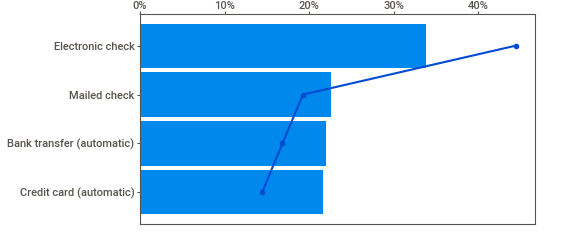
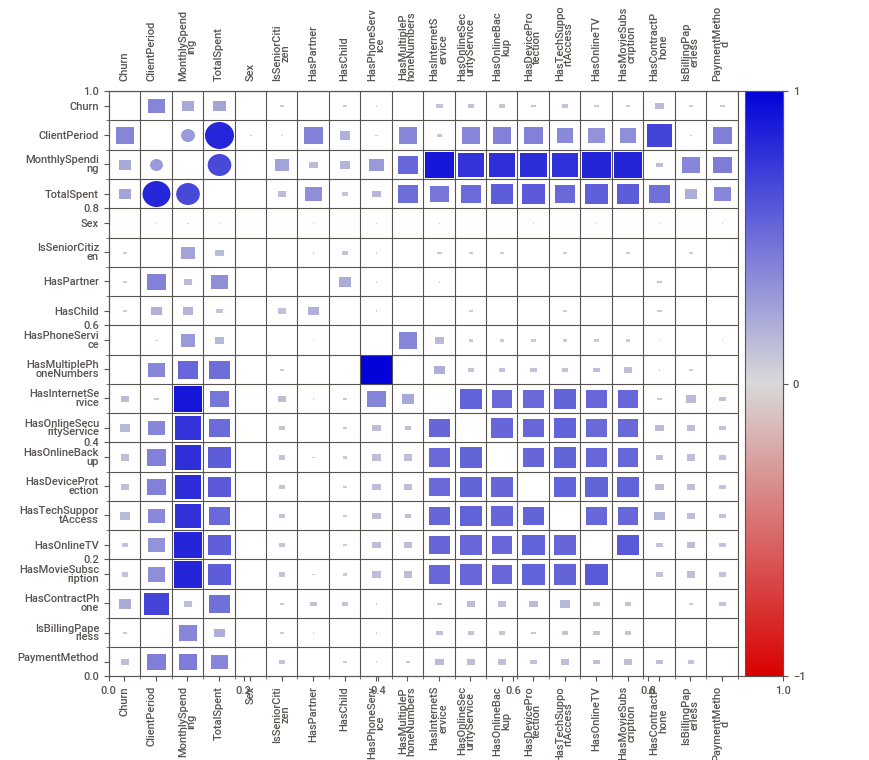
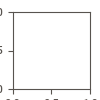

In [76]:
import sweetviz as sv

report = sv.analyze(data, 'Churn')
report.show_notebook()

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /Users/glebpankeev/Desktop/DLS/DLS2024-2025/SemCV3PanAsembl/train.csv
100%|████████████████████████████████████████| 664k/664k [00:00<00:00, 1.86MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /Users/glebpankeev/Desktop/DLS/DLS2024-2025/SemCV3PanAsembl/test.csv
100%|█████████████████████████████████████████| 218k/218k [00:00<00:00, 843kB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /Users/glebpankeev/Desktop/DLS/DLS2024-2025/SemCV3PanAsembl/submission.csv
100%|██████████████████████████████████████| 14.7k/14.7k [00:00<00:00, 16.0MB/s]


In [4]:
data = pd.read_csv('./train.csv')

In [6]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [28]:
#data.isna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [31]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
data['TotalSpent'].fillna(data['TotalSpent'].median(), inplace=True)


In [32]:
for col in feature_cols:
    unique_vals = data[col].unique()
    print(f"Колонка: {col}")
    print(f"Уникальные значения: {unique_vals}")
    print(f"Количество уникальных значений: {len(unique_vals)}")
    print("-" * 40)  # разделитель для удобства чтения

Колонка: ClientPeriod
Уникальные значения: [55 72  1 32 60 25 27 50 16 70 69 26 38 30 52 71 59 61  7 20 48 22  2 21
 44 66 58 46 45  5  4  3 62  6 39 68 51 40 10 43 12 35 31 67  8 11 29 37
 33 14 15 47 23 65 13 41 53  9 64 42 34 17 18 63 56 54 24 28 49 19 57 36
  0]
Количество уникальных значений: 73
----------------------------------------
Колонка: MonthlySpending
Уникальные значения: [ 19.5   25.85  75.9  ... 112.25 117.5   98.2 ]
Количество уникальных значений: 1468
----------------------------------------
Колонка: TotalSpent
Уникальные значения: [1026.35 1872.2    75.9  ...   55.05 2215.25 1375.6 ]
Количество уникальных значений: 4977
----------------------------------------
Колонка: Sex
Уникальные значения: ['Male' 'Female']
Количество уникальных значений: 2
----------------------------------------
Колонка: IsSeniorCitizen
Уникальные значения: [0 1]
Количество уникальных значений: 2
----------------------------------------
Колонка: HasPartner
Уникальные значения: ['Yes' 'No']
Коли

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

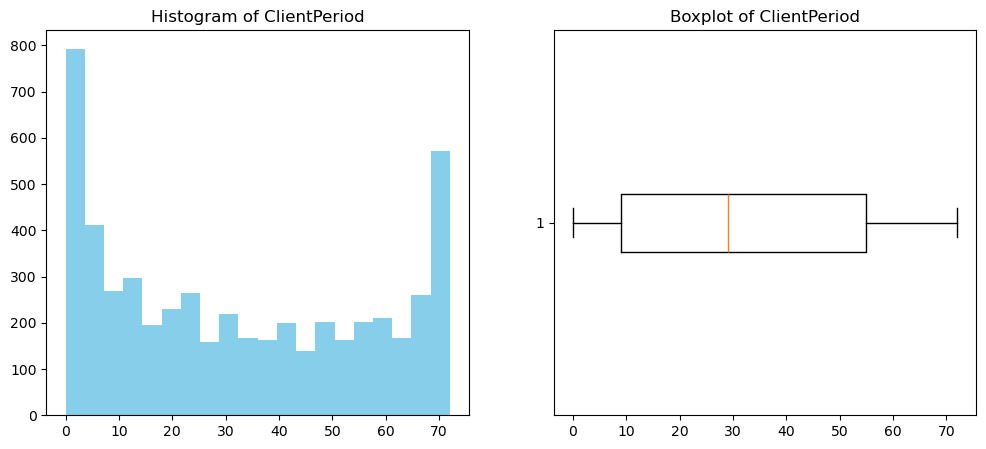

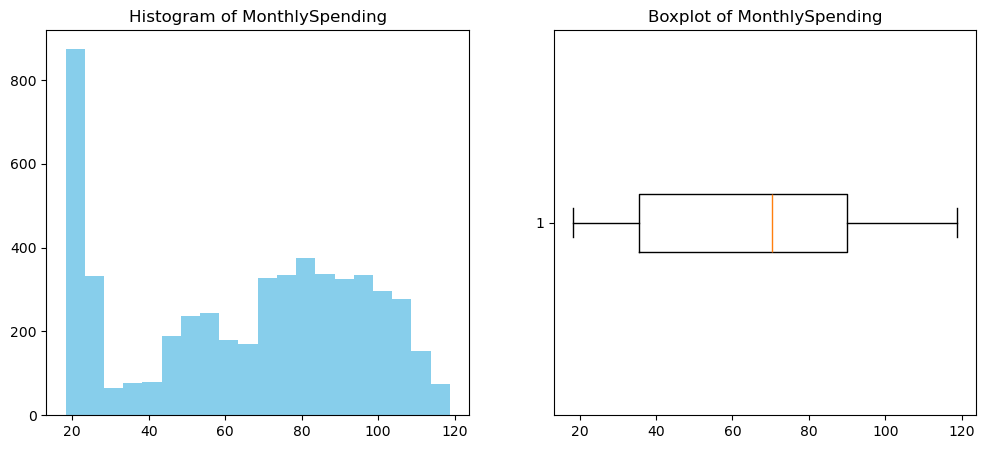

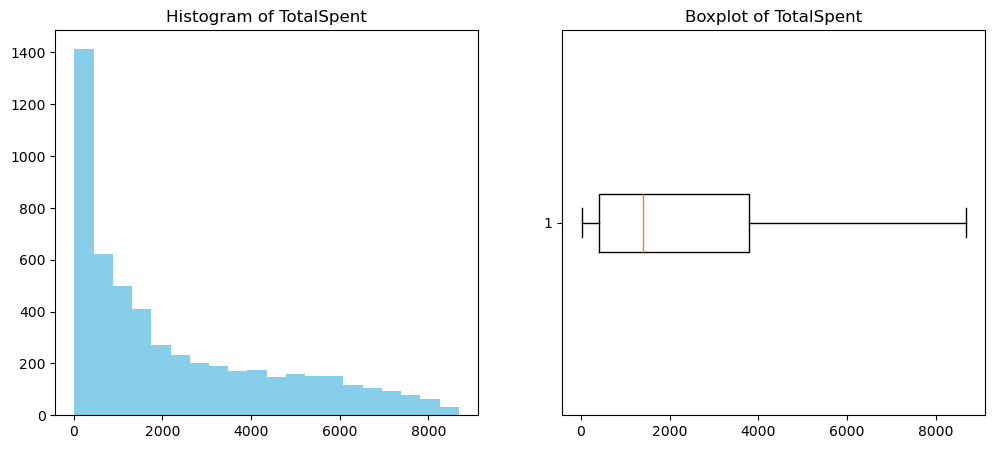

In [33]:
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(data[col].dropna(), bins=20, color='skyblue')
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    plt.boxplot(data[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    
    plt.show()


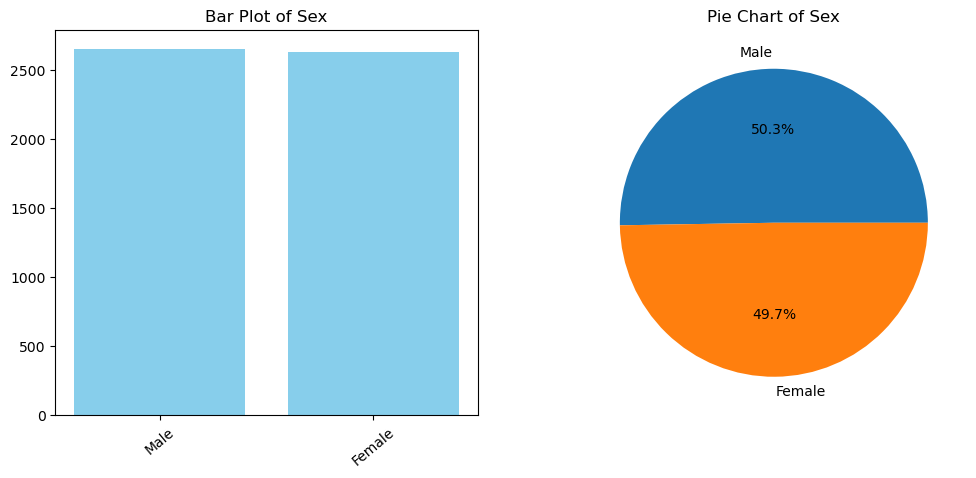

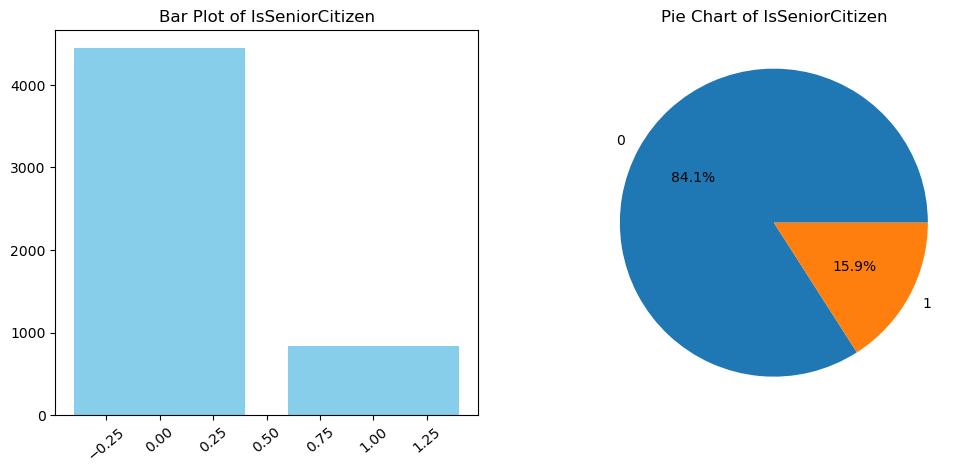

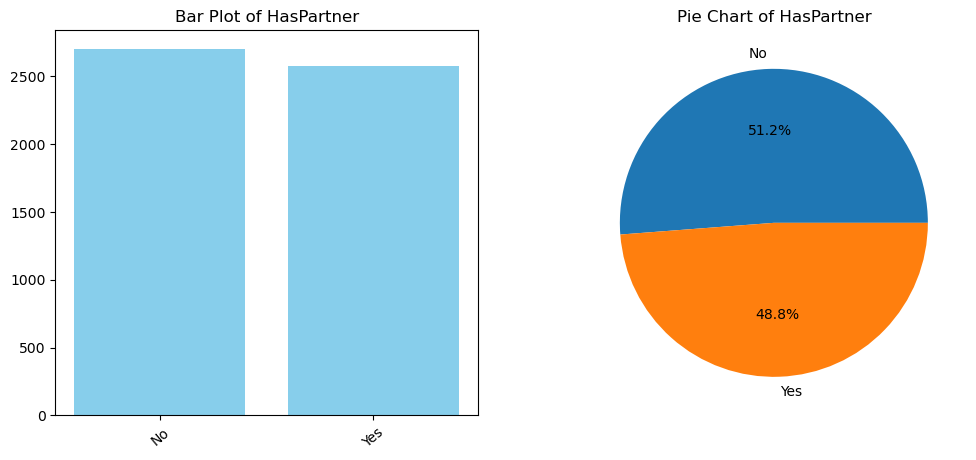

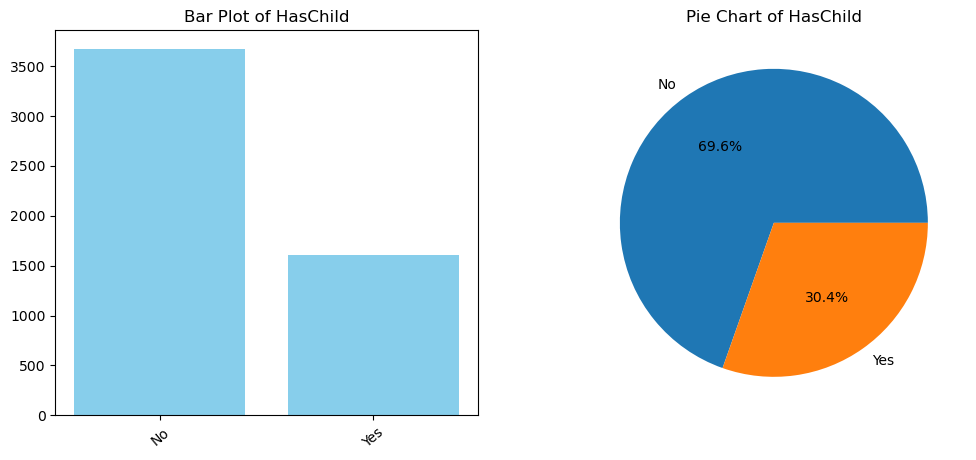

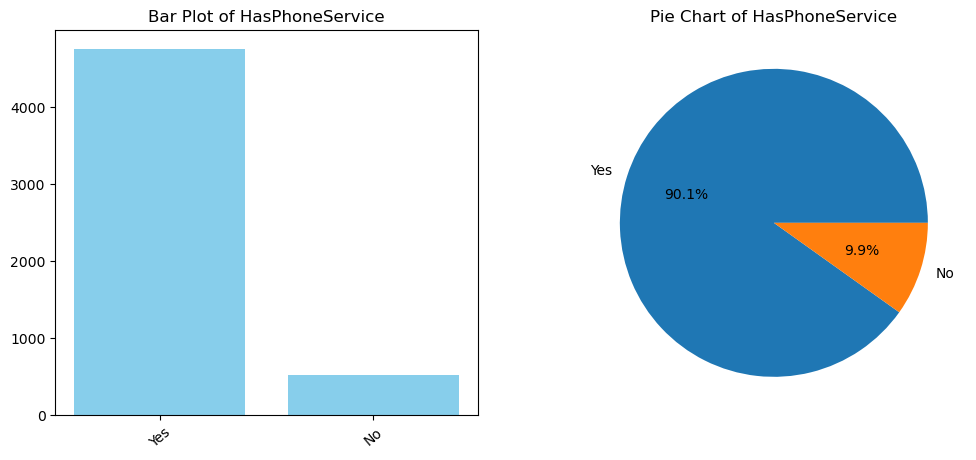

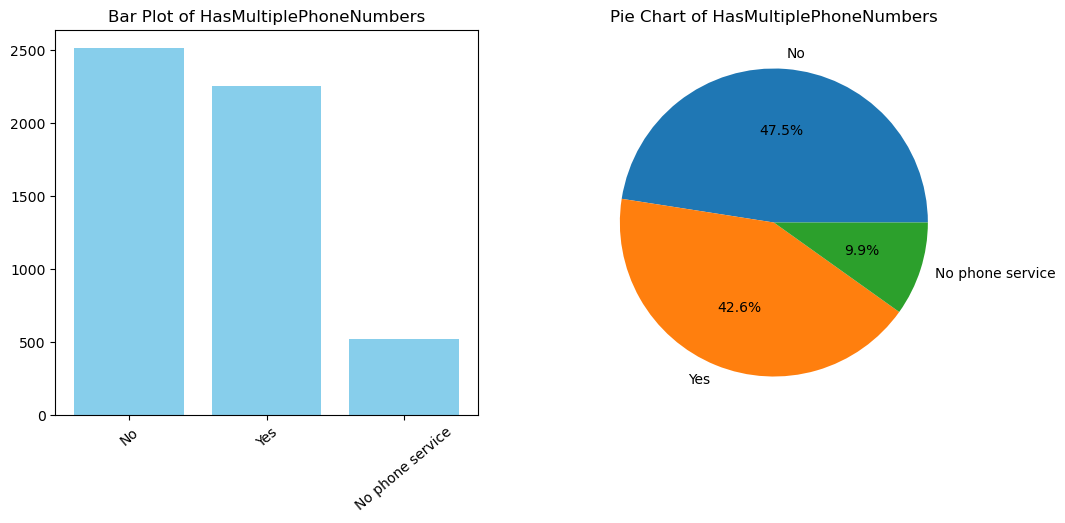

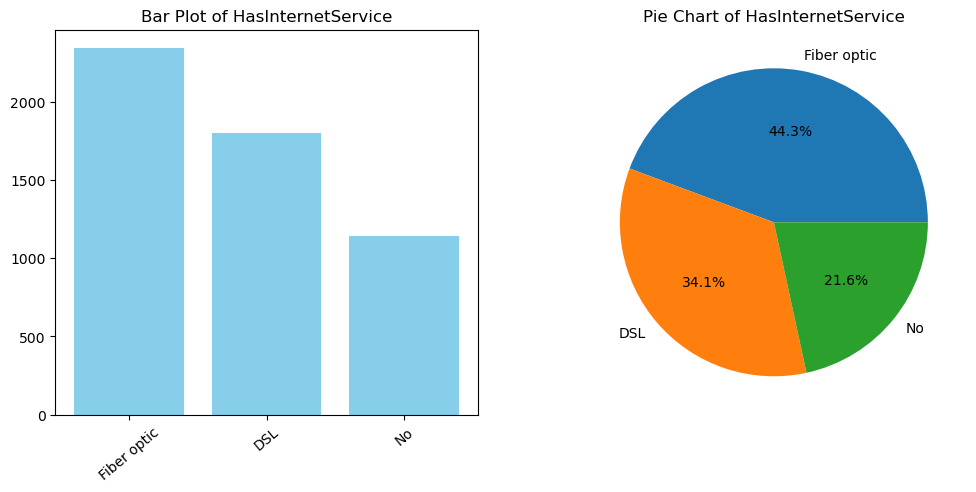

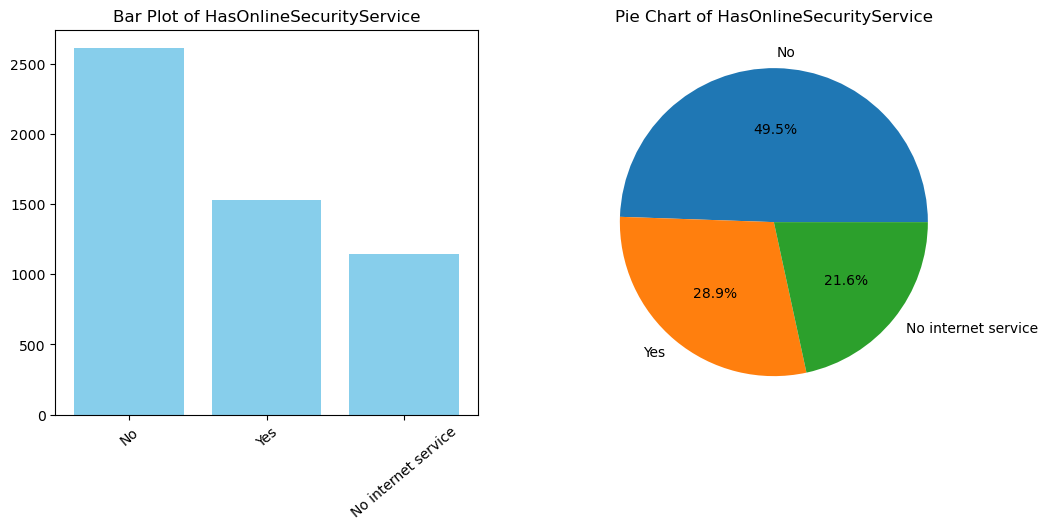

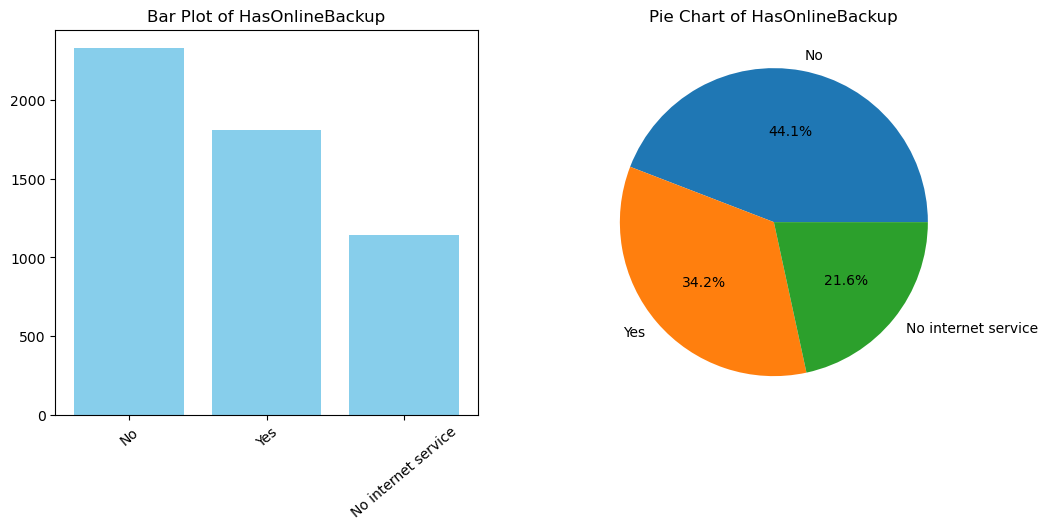

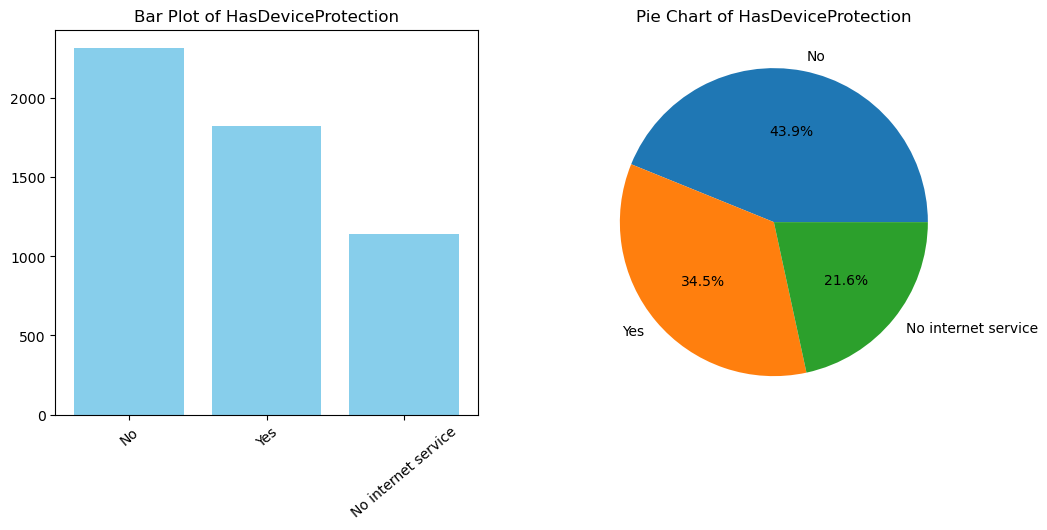

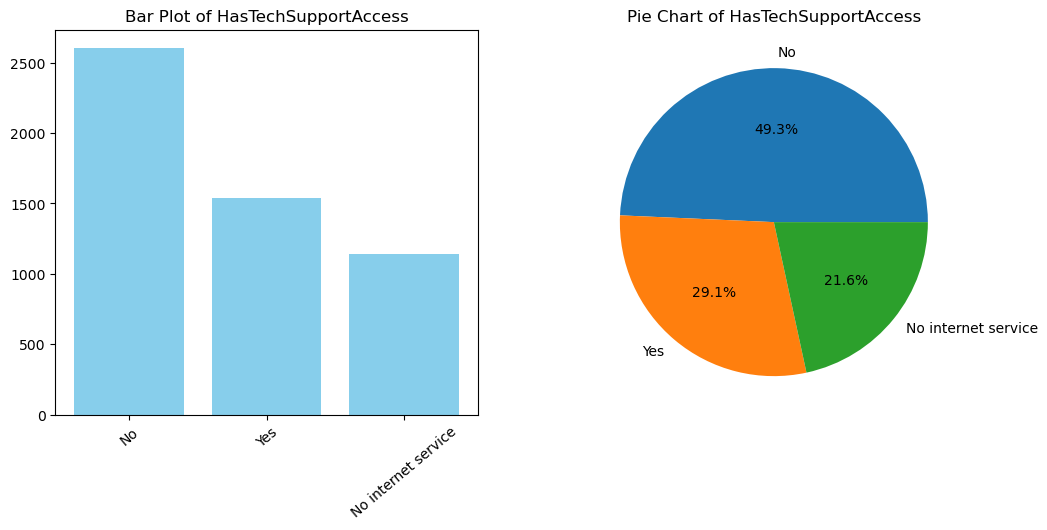

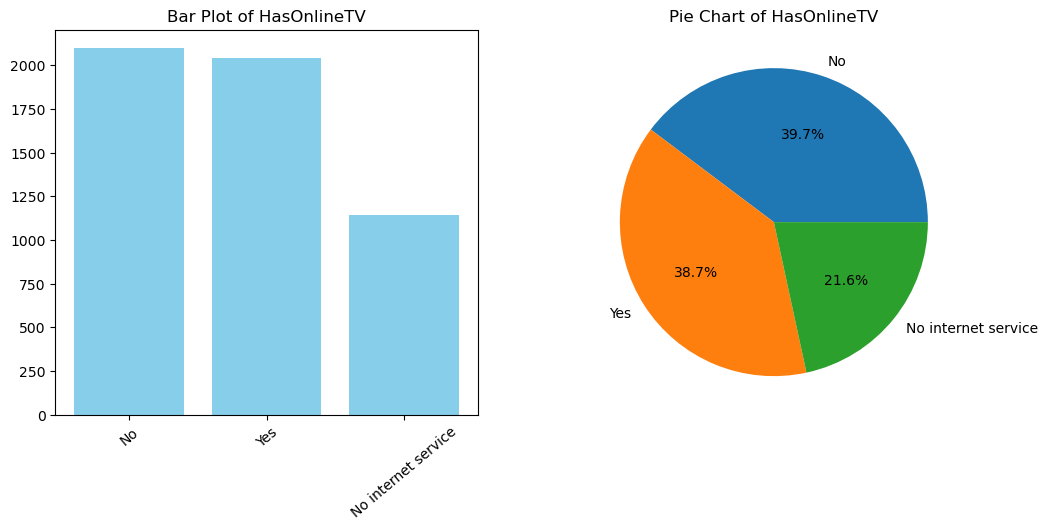

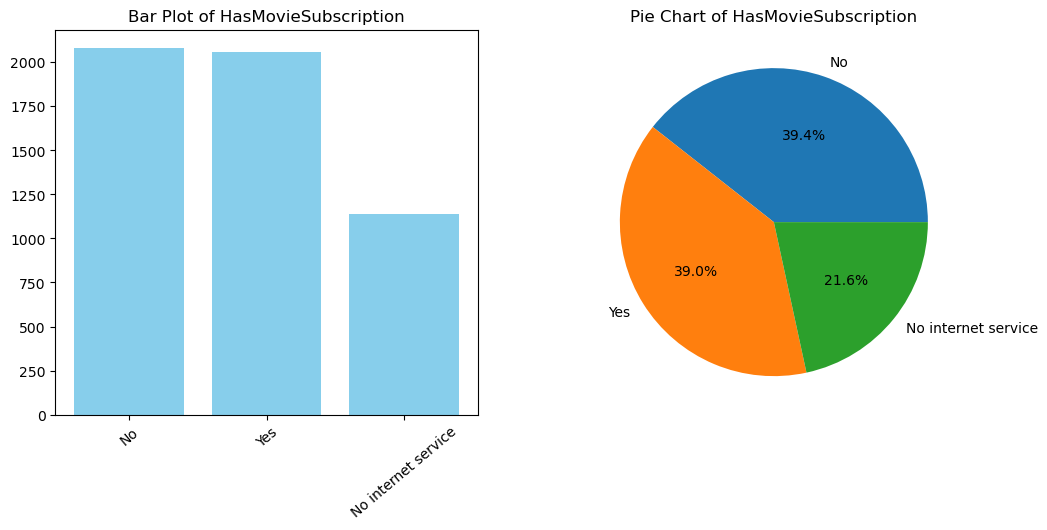

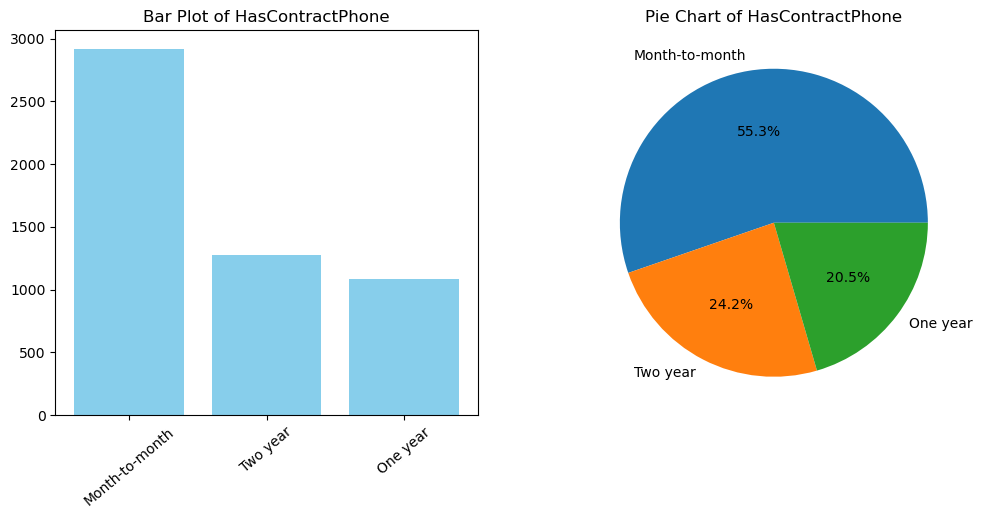

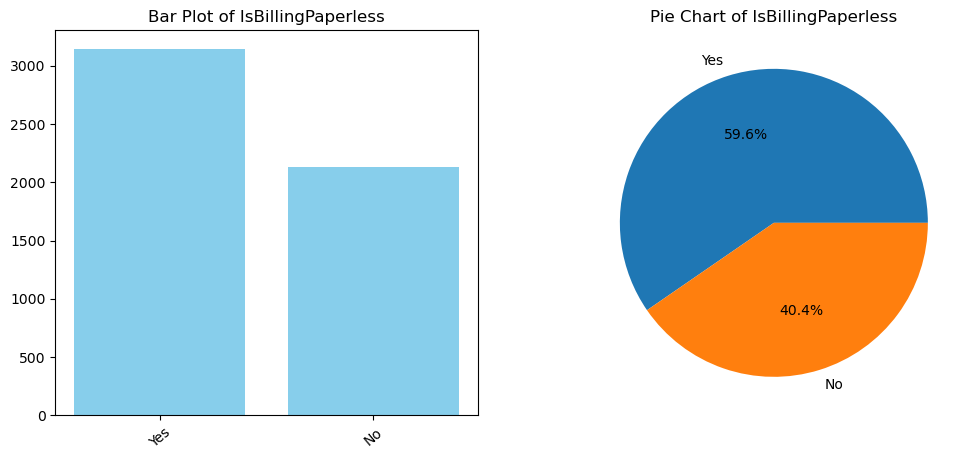

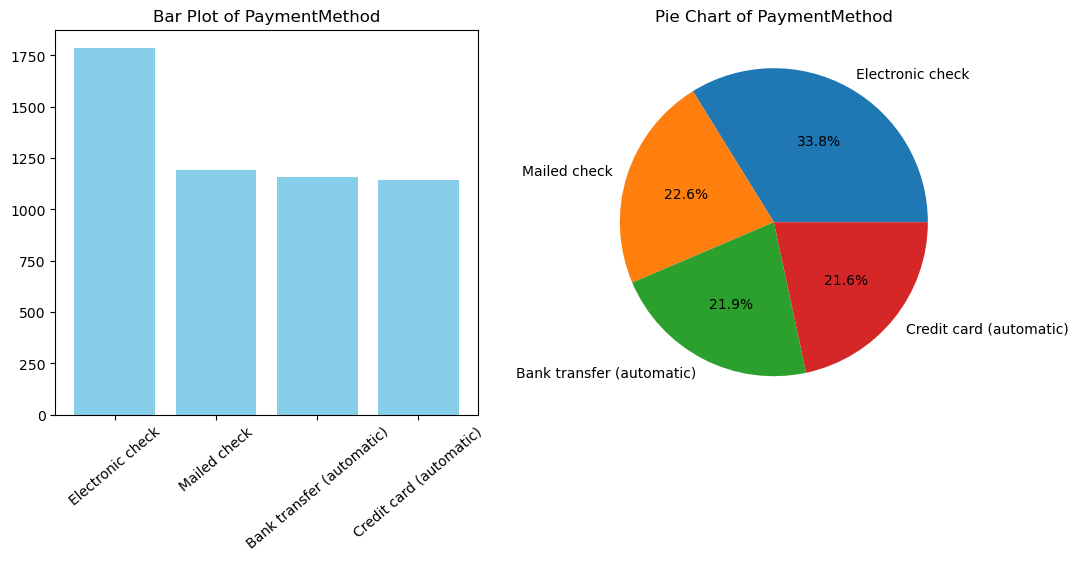

In [42]:
for col in cat_cols:
    counts = data[col].value_counts()
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.bar(counts.index, counts.values, color='skyblue')
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=40)
    
    plt.subplot(1, 2, 2)
    plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart of {col}')
    
    plt.show()


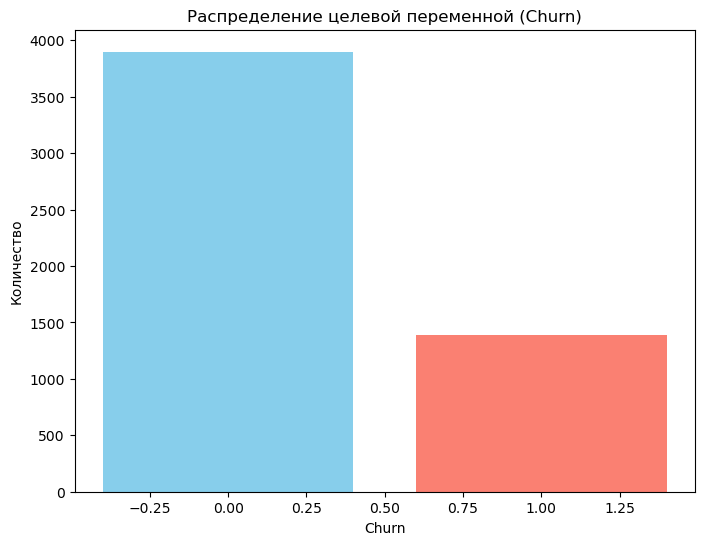

Churn
0    3898
1    1384
Name: count, dtype: int64


In [43]:
target_counts = data[target_col].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(target_counts.index, target_counts.values, color=['skyblue', 'salmon'])
plt.title('Распределение целевой переменной (Churn)')
plt.xlabel('Churn')
plt.ylabel('Количество')
plt.show()

print(target_counts)


Сбалансирована

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [45]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [52]:
X = data[feature_cols]
y = data[target_col]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2 ,shuffle = True)

In [64]:
#label+onehot
label_encoders = {}
X_train_label_encoded = X_train[cat_cols].copy()
X_test_label_encoded = X_test[cat_cols].copy()

for col in cat_cols:
    le = LabelEncoder()
    X_train_label_encoded[col] = le.fit_transform(X_train[col])
    X_test_label_encoded[col] = le.transform(X_test[col])
    label_encoders[col] = le


one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_cat = one_hot_encoder.fit_transform(X_train_label_encoded)
X_test_cat = one_hot_encoder.transform(X_test_label_encoded)


scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

# Объединение
X_train_prepared = np.hstack((X_train_num, X_train_cat))
X_test_prepared = np.hstack((X_test_num, X_test_cat))


In [66]:
# Модель с кросс-валидацией по параметру C
model = LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], 
                             scoring='roc_auc', 
                             cv=5, 
                             refit=True, 
                             random_state=42)

# Обучение модели и подбор лучшего параметра
model.fit(X_train_prepared , y_train)

# Оценка на валидационном наборе
y_test_pred = model.predict_proba(X_test_prepared)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred)
print(f"Лучшее значение C: {model.C_[0]}")
print(f"ROC-AUC на валидации: {roc_auc}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Лучшее значение C: 10.0
ROC-AUC на валидации: 0.8268845292191596


In [65]:

# Создаем Pipeline для обработки и модели
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))

# Задаем сетку значений для C
param_grid = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]}

# GridSearch с оценкой по метрике ROC-AUC
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, refit=True)
grid_search.fit(X_train_prepared, y_train)

# Выводим лучший параметр и метрику
print(f"Лучшее значение C: {grid_search.best_params_['logisticregression__C']}")
print(f"Лучший ROC-AUC: {grid_search.best_score_}")

Лучшее значение C: 10
Лучший ROC-AUC: 0.8493161988443232


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее значение C: 10
Лучший ROC-AUC: 0.8493118395155547

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [68]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Разделение на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Инициализация модели с базовыми параметрами
model = CatBoostClassifier(cat_features=cat_cols, verbose=0)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание и оценка метрики ROC-AUC
y_pred = model.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_pred)
print(f"ROC-AUC базовой модели: {roc_auc:.4f}")

ROC-AUC базовой модели: 0.8247


In [69]:
# Поиск оптимальных параметров
best_auc = 0
best_params = {}

for lr in [0.01, 0.1, 0.2]:
    for n_estimators in [100, 200, 300]:
        model = CatBoostClassifier(cat_features=cat_cols, learning_rate=lr, iterations=n_estimators, verbose=0)
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_valid)[:, 1]
        auc = roc_auc_score(y_valid, y_pred)
        
        if auc > best_auc:
            best_auc = auc
            best_params = {'learning_rate': lr, 'iterations': n_estimators}

print(f"Лучший ROC-AUC: {best_auc:.4f} с параметрами: {best_params}")


Лучший ROC-AUC: 0.8277 с параметрами: {'learning_rate': 0.01, 'iterations': 300}


Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

Лучший ROC-AUC: 0.8277 с параметрами: {'learning_rate': 0.01, 'iterations': 300}

# Предсказания

In [74]:
from catboost import CatBoostClassifier
import pandas as pd

# Обучение модели с лучшими параметрами
best_model = CatBoostClassifier(cat_features=cat_cols, learning_rate=best_params['learning_rate'], 
                                iterations=best_params['iterations'], verbose=0)
best_model.fit(X_train, y_train)

# Предсказание вероятности для тестового набора
submission = pd.read_csv('./submission.csv')
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]

# Сохранение предсказаний
submission.to_csv('./my_submission.csv', index=False)


Лучшее решение отправьте в Stepik.